## Contents
1) Importing Libraries and Data
2) Data Cleaning
3) Time-Series Subset Creation
4) Time-Series Analysis Decomposition
5) Testing for Stationarity & Auotcorrelation Chart
6) Differencing Stationarizing for 'profit' Column

### 1) Importing Libraries and Data

In [2]:
# Importing Libraries

import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
from datetime import datetime
import warnings

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [4]:
# Import path

path=r'C:\Users\Drew\Superstore'

In [5]:
# Import dataframe

df=pd.read_csv(os.path.join(path,'02 Data','Prepared Data','product_sales_clusters.csv'),index_col=False)

### 2) Data Cleaning

In [6]:
pd.set_option('display.max_columns',None)

df.head()

,order_id,order_date,ship_date,ship_mode,customer_id,customer_segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,total_orders,buyer_behavior_segment,clusters,cluster_profit_quantity,cluster_profit_total_orders,cluster_sales_quantity,cluster_sales_total_orders,cluster_sales_by_profit,cluster
0,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91,5,Occasional Buyer,0,Low-Profit-By-Quantity,Low-Profit-By-Orders,Low-Sales-By-Quantity,Low-Sales-By-Orders,Low-Sales-By-Profit,Dark Purple
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58,5,Occasional Buyer,0,Low-Profit-By-Quantity,Low-Profit-By-Orders,Low-Sales-By-Quantity,Low-Sales-By-Orders,Low-Sales-By-Profit,Dark Purple
2,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87,9,Occasional Buyer,0,Low-Profit-By-Quantity,Low-Profit-By-Orders,Low-Sales-By-Quantity,Low-Sales-By-Orders,Low-Sales-By-Profit,Dark Purple
3,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03,15,Consistent Buyer,1,Medium-Profit-By-Quantity,Medium-Profit-By-Orders,Medium-Sales-By-Quantity,Medium-Sales-By-Orders,Medium-Sales-By-Profit,Cyan
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52,15,Consistent Buyer,0,Low-Profit-By-Quantity,Low-Profit-By-Orders,Low-Sales-By-Quantity,Low-Sales-By-Orders,Low-Sales-By-Profit,Dark Purple


In [25]:
df.shape

(9993, 28)

In [7]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id',
       'customer_segment', 'country', 'city', 'state', 'postal_code', 'region',
       'product_id', 'category', 'sub_category', 'product_name', 'sales',
       'quantity', 'discount', 'profit', 'total_orders',
       'buyer_behavior_segment', 'clusters', 'cluster_profit_quantity',
       'cluster_profit_total_orders', 'cluster_sales_quantity',
       'cluster_sales_total_orders', 'cluster_sales_by_profit', 'cluster'],
      dtype='object')

In [9]:
df.dtypes

order_id                        object
order_date                      object
ship_date                       object
ship_mode                       object
customer_id                     object
customer_segment                object
country                         object
city                            object
state                           object
postal_code                      int64
region                          object
product_id                      object
category                        object
sub_category                    object
product_name                    object
sales                          float64
quantity                         int64
discount                       float64
profit                         float64
total_orders                     int64
buyer_behavior_segment          object
clusters                         int64
cluster_profit_quantity         object
cluster_profit_total_orders     object
cluster_sales_quantity          object
cluster_sales_total_order

In [10]:
# Converting postal code to string format

df['postal_code']=df['postal_code'].astype(str)

# Converting order date & ship date to datetime

df['order_date']=pd.to_datetime(df['order_date'])
df['ship_date']=pd.to_datetime(df['ship_date'])

In [11]:
df.dtypes

order_id                               object
order_date                     datetime64[ns]
ship_date                      datetime64[ns]
ship_mode                              object
customer_id                            object
customer_segment                       object
country                                object
city                                   object
state                                  object
postal_code                            object
region                                 object
product_id                             object
category                               object
sub_category                           object
product_name                           object
sales                                 float64
quantity                                int64
discount                              float64
profit                                float64
total_orders                            int64
buyer_behavior_segment                 object
clusters                          

In [13]:
# Checking for missing values before creating subset of necessary columns

df.isnull().sum()

order_id                       0
order_date                     0
ship_date                      0
ship_mode                      0
customer_id                    0
customer_segment               0
country                        0
city                           0
state                          0
postal_code                    0
region                         0
product_id                     0
category                       0
sub_category                   0
product_name                   0
sales                          0
quantity                       0
discount                       0
profit                         0
total_orders                   0
buyer_behavior_segment         0
clusters                       0
cluster_profit_quantity        0
cluster_profit_total_orders    0
cluster_sales_quantity         0
cluster_sales_total_orders     0
cluster_sales_by_profit        0
cluster                        0
dtype: int64

In [15]:
# Checking duplicates before creating subset of necessary columns

dup=df.duplicated()

dup.sum()

0

### 3) Creating Subset for Time Series

In [16]:
# Creating subset based on the necessary columns for time series 

df_nec=df[['order_date','sales','profit']]

In [17]:
df_nec.head()

,order_date,sales,profit
0,2016-11-08,261.96,41.91
1,2016-11-08,731.94,219.58
2,2016-06-12,14.62,6.87
3,2015-10-11,957.58,-383.03
4,2015-10-11,22.37,2.52


In [26]:
df_nec.shape

(9993, 3)

In [18]:
df_nec.columns

Index(['order_date', 'sales', 'profit'], dtype='object')

In [19]:
df_nec.dtypes

order_date    datetime64[ns]
sales                float64
profit               float64
dtype: object

In [20]:
df_nec.isnull().sum()

order_date    0
sales         0
profit        0
dtype: int64

In [23]:
dups_nec=df_nec.duplicated()

dups_nec.sum()

5

In [24]:
duplicate_rows=df_nec[df_nec.duplicated()]

duplicate_rows

,order_date,sales,profit
5557,2015-12-06,6.48,3.11
5934,2016-07-04,25.40,8.64
8296,2015-07-05,4.93,0.74
9080,2017-09-11,19.44,9.33
9467,2017-11-05,12.96,6.22


#### duplicates are due to the absence of the order_id column so they will be left in.

In [31]:
# Resetting index to use order date column as filter

df_2=df_nec.reset_index()

df_2

,index,order_date,sales,profit
0,0,2016-11-08,261.96,41.91
1,1,2016-11-08,731.94,219.58
2,2,2016-06-12,14.62,6.87
3,3,2015-10-11,957.58,-383.03
4,4,2015-10-11,22.37,2.52
...,...,...,...,...
9988,9988,2014-01-21,25.25,4.10
9989,9989,2017-02-26,91.96,15.63
9990,9990,2017-02-26,258.58,19.39
9991,9991,2017-02-26,29.60,13.32


In [39]:
# Dropping index column as unneeded

df_2=df_2.drop(columns='index')

In [40]:
df_2.dtypes

order_date    datetime64[ns]
sales                float64
profit               float64
dtype: object

In [42]:
df_2

,order_date,sales,profit
0,2016-11-08,261.96,41.91
1,2016-11-08,731.94,219.58
2,2016-06-12,14.62,6.87
3,2015-10-11,957.58,-383.03
4,2015-10-11,22.37,2.52
...,...,...,...
9988,2014-01-21,25.25,4.10
9989,2017-02-26,91.96,15.63
9990,2017-02-26,258.58,19.39
9991,2017-02-26,29.60,13.32


In [43]:
# Setting order_date as index for new df_2

df_2['datetime']=pd.to_datetime(df_2['order_date'])
df_2=df_2.set_index('datetime')
df_2.drop(['order_date'],axis=1,inplace=True)
df_2.head()

,sales,profit
datetime,,
2016-11-08,261.96,41.91
2016-11-08,731.94,219.58
2016-06-12,14.62,6.87
2015-10-11,957.58,-383.03
2015-10-11,22.37,2.52


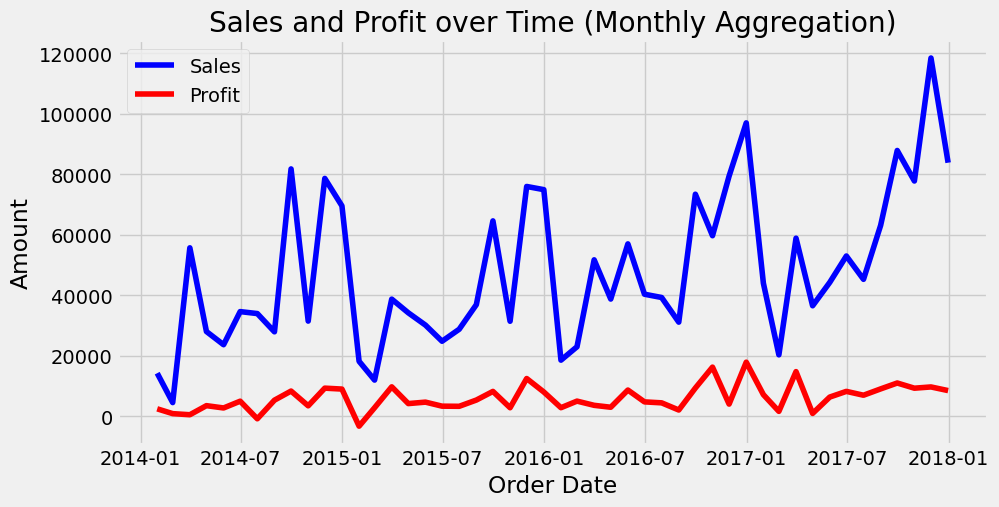

In [52]:
# Group by order date (monthly) and aggregate sales and profit
df_grouped = df_2.resample('M').agg({'sales': 'sum','profit': 'sum'})

# Plotting both sales and profit over time on the same graph
plt.figure(figsize=(10,5), dpi=100)

# Plotting sales and profit
plt.plot(df_grouped.index, df_grouped['sales'], label='Sales', color='blue')
plt.plot(df_grouped.index, df_grouped['profit'], label='Profit', color='red')
plt.xlabel('Order Date')
plt.ylabel('Amount')
plt.title('Sales and Profit over Time (Monthly Aggregation)')
plt.legend()

plt.show()

In [53]:
# Checking df_grouped for missing values

df_grouped.isnull().sum()

sales     0
profit    0
dtype: int64

In [54]:
# Checking for duplicates

dups_grouped=df_grouped.duplicated()

dups_grouped.sum()

0

#### Chart Analysis:
1) Sales: Line shows a growth with an increasing trend from 2014 to 2018 with regular peaks for seasonal trends. Noteable spikes appear to occur durring mid and end of the years indicating high demands during possible holidays and sales/discount times.
2) Profit: Trend remains consistent with relatively flat line with minimal fluctuations, indicating that as sales volumes increase, the profit margins do not improve at similar rates.    

### 4) Time-Series Analysis Decomposition

In [63]:
# Decomposing time series for sales using additive model
df_grouped.index = pd.date_range(start=df_grouped.index[0], periods=len(df_grouped), freq='M')
period = 12
decomposition_sales=sm.tsa.seasonal_decompose(df_grouped['sales'],model='additive',period=period)

<function matplotlib.pyplot.show(close=None, block=None)>

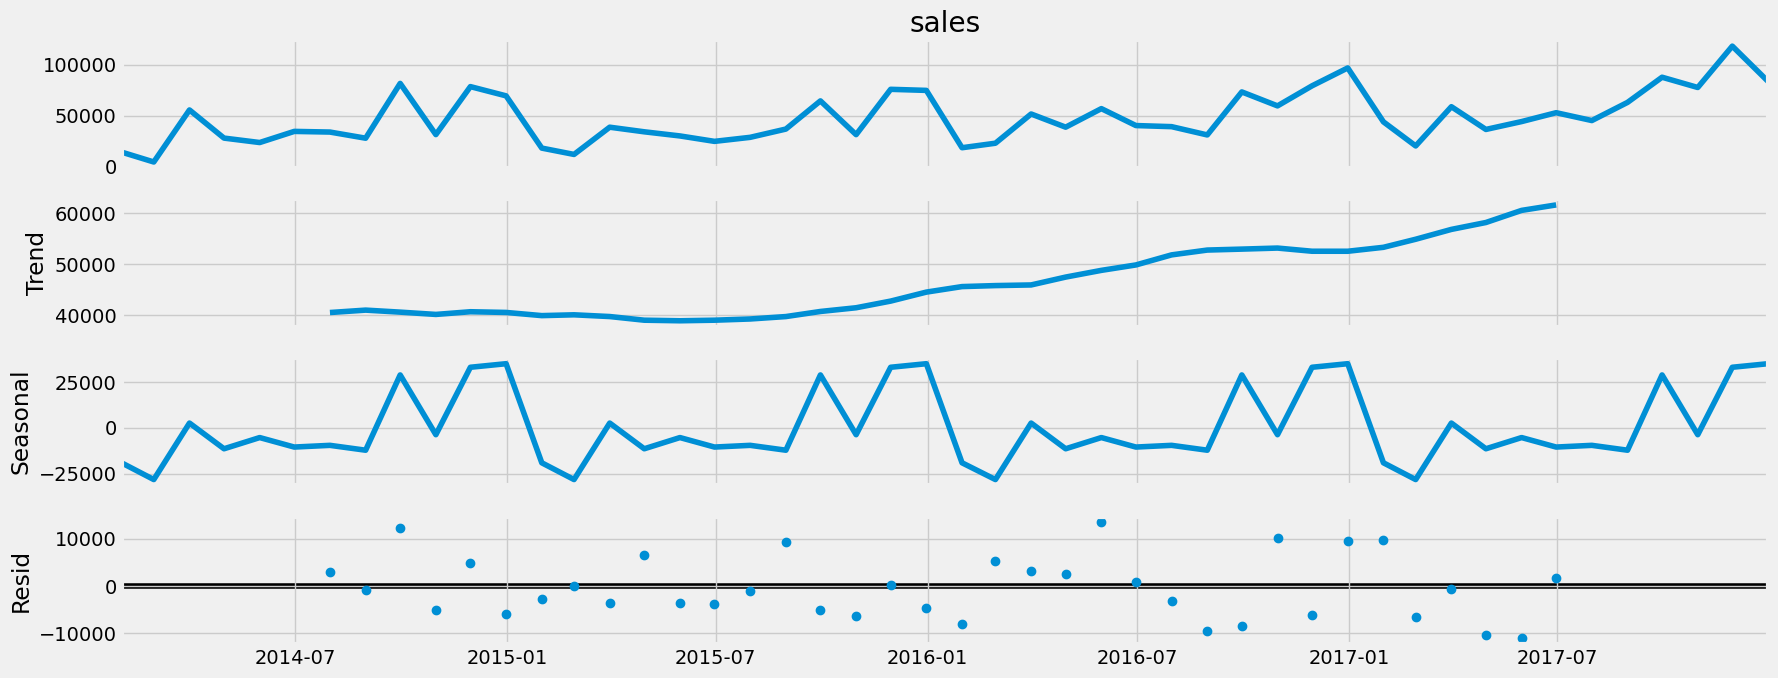

In [64]:
# Defining fixed size for all special charts
from pylab import rcParams
rcParams['figure.figsize']=18,7

# Plotting separate components for sales
decomposition_sales.plot()
plt.show

In [65]:
# Decomposing time series for profit using additive model

decomposition_profit=sm.tsa.seasonal_decompose(df_grouped['profit'],model='additive',period=period)

<function matplotlib.pyplot.show(close=None, block=None)>

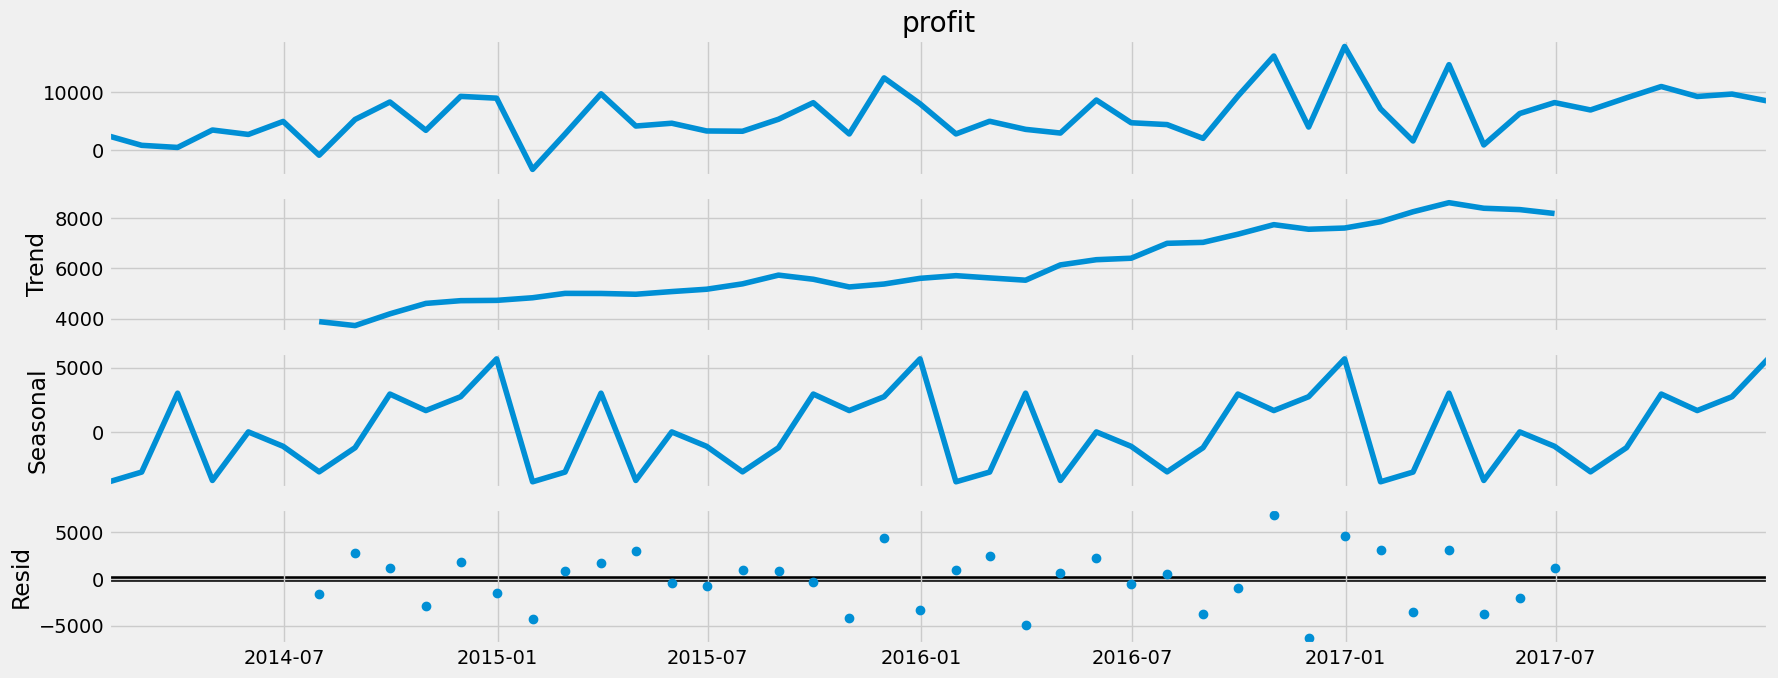

In [66]:
# Plotting separate components for profit
decomposition_profit.plot()
plt.show

#### Chart Analysis
1) sales: The trend shows a consistent upward growth over the years,especially starting from 2016. The seasonal data shows noticeable seasonality peaks with regular rises and falls that appear to fall around noteable holiday periods that could indicate seasonal sale patterns or times when discounts could be most common. The residual chart shows flucations around the zero line, incdicating the effect of unexpected fluctuations in sales factors.
2) Profit: The trend line indicates steady profit growth, while not as noteable compared to the sales trend. This could indicate that while the company is generating more sales, profit margins remain relatively low and are not increasing as quickly as sales due to possible costs or lower profits during higher sale periods. The seasonality shows a a repeating pattern similar to sales, but with less extremes compared to the sale's seasonality line. This suggests that profit is also seasonality with its peaks less noticeable than sales and possibly imacpted due to costs or high-sales periods. The residuals, similar to sales, revolves around the zero line, but with fewer outlying dots than sales, suggesting that profits appear to be more consistent and less affected to unexpected changes than sales. 

### 5) Testing for Stationarity & Autocorrelation Chart Creation

In [70]:
# Importing adfuller function

from statsmodels.tsa.stattools import adfuller

def dickey_fuller(timeseries):
    print('Dickey-Fuller Stationary test:')
    test=adfuller(timeseries,autolag='AIC')
    result=pd.Series(test[0:4],index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
        result['Critical Value (%s)'%key]=value
    print (result)

# Applying Dickey Fuller test on sales time series
dickey_fuller(df_grouped['sales'])

Dickey-Fuller Stationary test:
Test Statistic                 -4.493593
p-value                         0.000202
Number of Lags Used             0.000000
Number of Observations Used    47.000000
Critical Value (1%)            -3.577848
Critical Value (5%)            -2.925338
Critical Value (10%)           -2.600774
dtype: float64


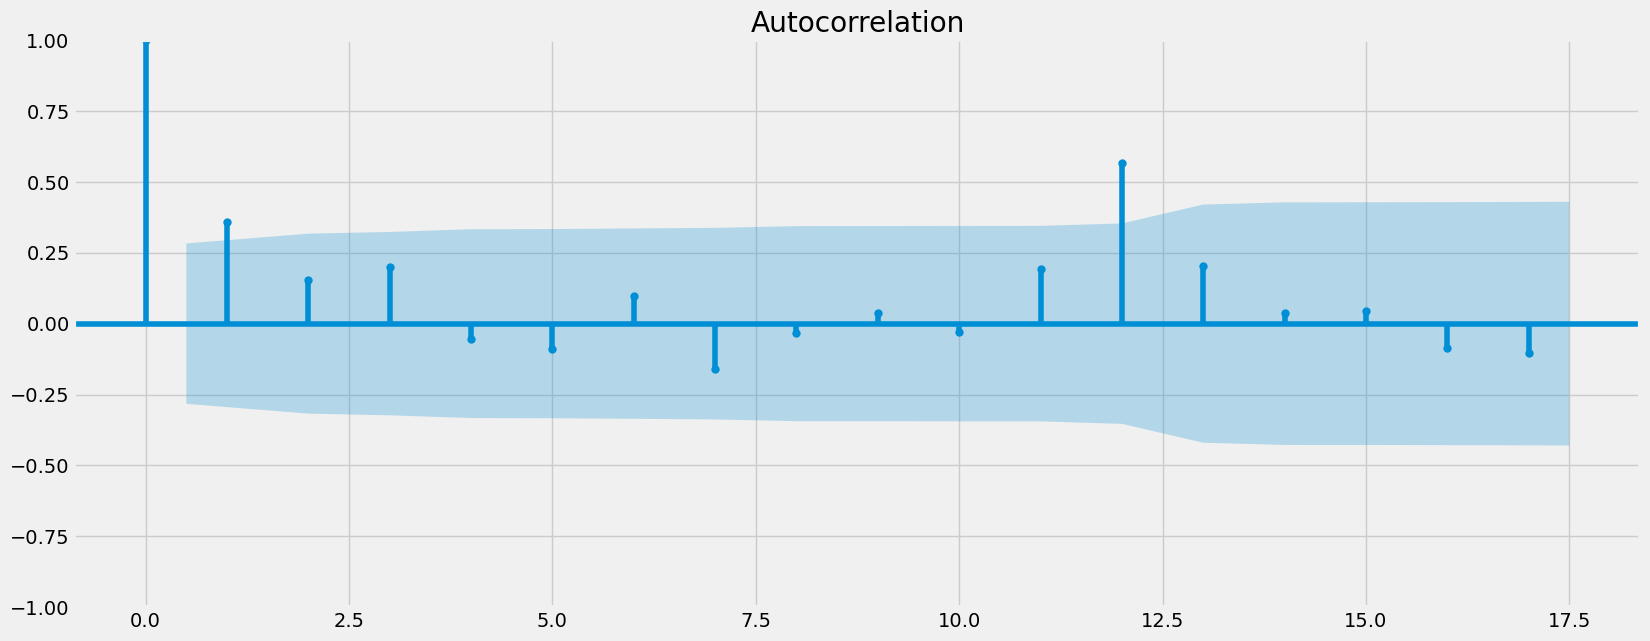

In [81]:
# Creating autocorrelation for stationary sales column

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df_grouped['sales'])
plt.show()

#### We can see that the test statistic is less than all critical values so we can reject null hypothesis of the data not being stationary. The p-value is less than 0.05 so we can determine the result as significant. Based on sales, we can say sales data is stationary.  

In [71]:
from statsmodels.tsa.stattools import adfuller

def dickey_fuller(timeseries):
    print('Dickey-Fuller Stationary test:')
    test=adfuller(timeseries,autolag='AIC')
    result=pd.Series(test[0:4],index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
        result['Critical Value (%s)'%key]=value
    print (result)

# Applying Dickey Fuller test on profit
dickey_fuller(df_grouped['profit'])

Dickey-Fuller Stationary test:
Test Statistic                 -2.828140
p-value                         0.054365
Number of Lags Used             3.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64


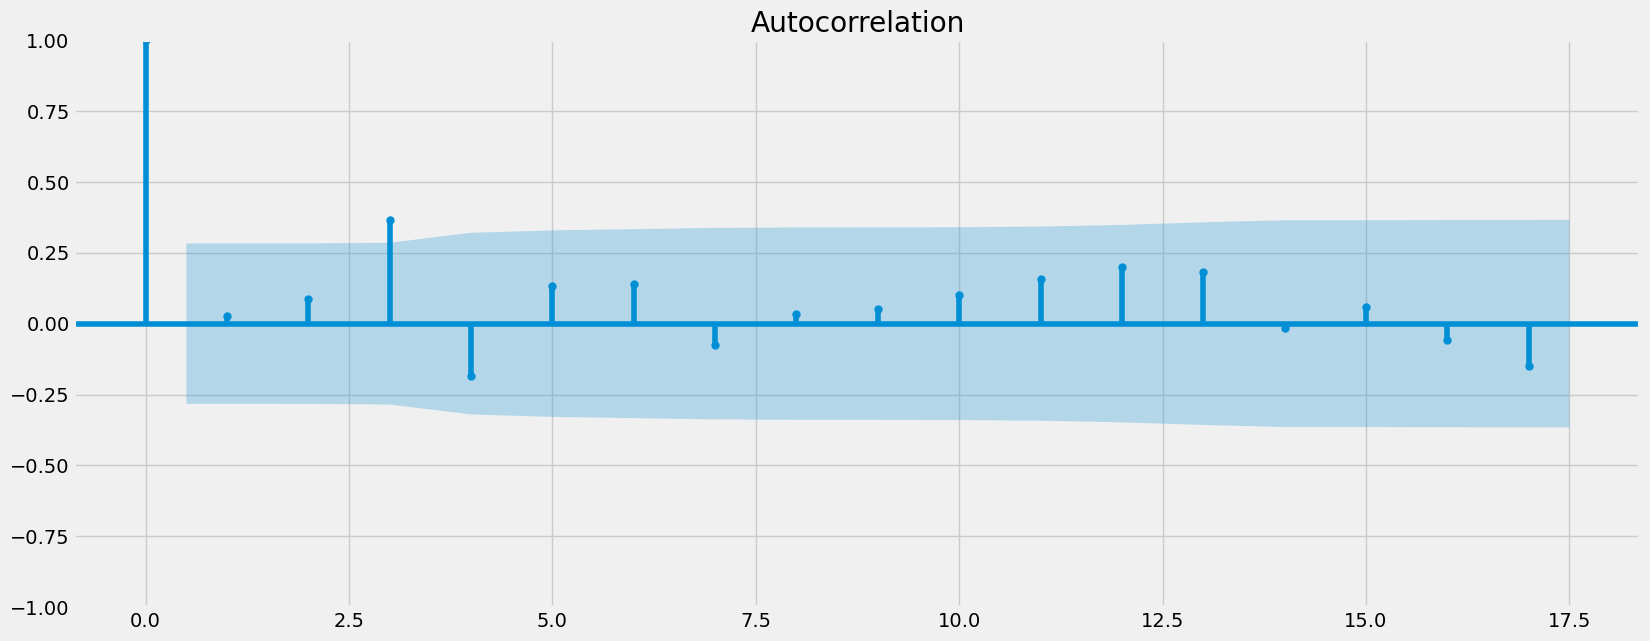

In [80]:
# Creating Autocorrelation for profit despite it not being stationary

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df_grouped['profit'])
plt.show()

#### We can see that the test statistic is greater than critical values of 1% & 5%, but is less than critical value 10%. We cannot reject the null hypothesis. The p-value is slightly greather than 0.05 and cannot be determined as significant. We will need to stationize the data with differencing.

### 6) Differencing Stationarizing for Profit Column

In [72]:
# Using differencing to convert profit for better stationarizing

profit_differencing=df_grouped['profit']-df_grouped['profit'].shift(1)

In [73]:
# Removing missing values due to the result of the differencing

profit_differencing.dropna(inplace=True)

In [74]:
profit_differencing.head()

2014-02-28   -1587.88
2014-03-31    -363.58
2014-04-30    3002.20
2014-05-31    -762.18
2014-06-30    2237.82
Freq: ME, Name: profit, dtype: float64

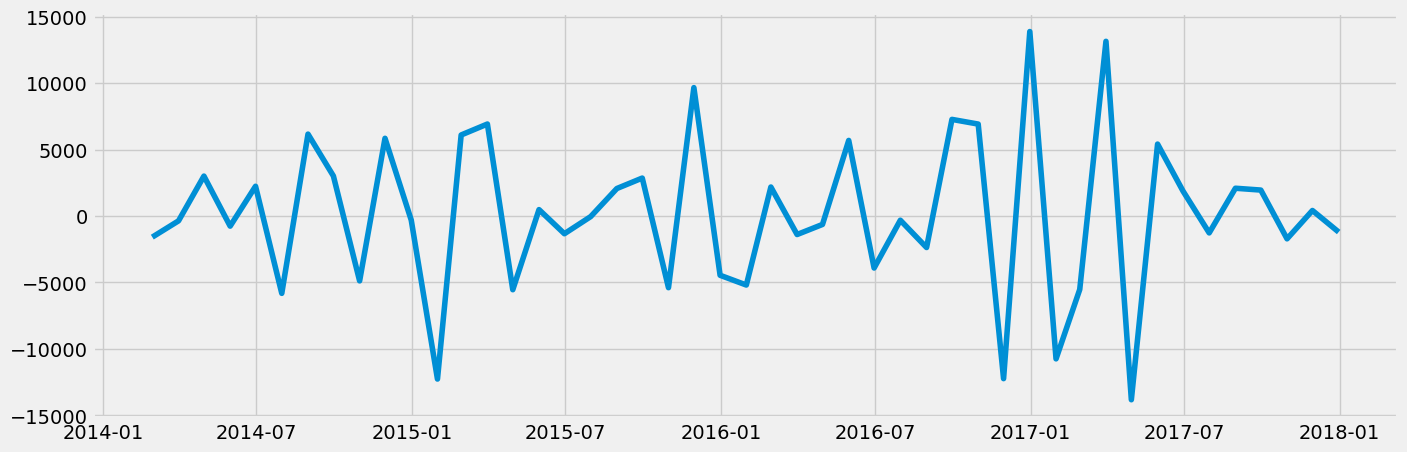

In [78]:
# Graphing what the differencing did to the profit time-series curve

plt.figure(figsize=(15,5),dpi=100)
plt.plot(profit_differencing)

In [79]:
# Running Dickey Fuller test on differencing profit

dickey_fuller(profit_differencing)

Dickey-Fuller Stationary test:
Test Statistic                -1.112411e+01
p-value                        3.407899e-20
Number of Lags Used            1.000000e+00
Number of Observations Used    4.500000e+01
Critical Value (1%)           -3.584829e+00
Critical Value (5%)           -2.928299e+00
Critical Value (10%)          -2.602344e+00
dtype: float64


#### We can see that now after differencing, the test statistic is much lower than all critical values of 1%, 5%, and 10% so we can reject the null hypothesis of the data not being stationarity. We can also see that the p-value has now become very close to 0 so we can be assured the data is now stationary.

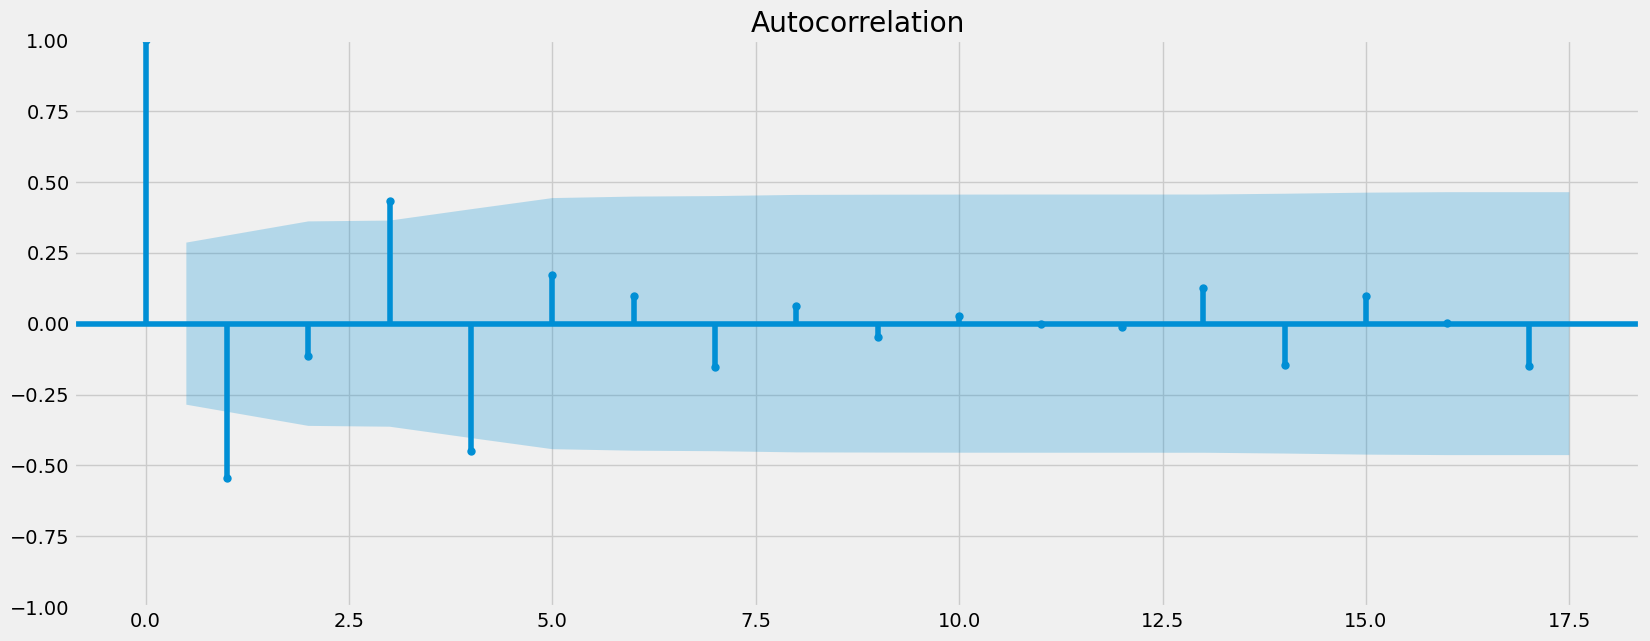

In [82]:
#### Creating autocorrelation for profit column after differencing

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(profit_differencing)
plt.show()